# Overview

 This is my first time participating in a Kaggle. I have used Kaggle competitions as learning resources in the past, and am now determined to become a competitor myself. Please see my [blog post](https://medium.com/@levimjoseph/getting-started-with-kaggle-competitions-63bee65fb31d) on the matter.  

Much has been written about the Titanic competition on Kaggle. There are several wonderful notebook write ups, such as Alexis Cook's [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial). Therefore, I will not belabor my introduction.  

That said, the Titanic Competition is a classification problem where we are tasked with predicting whether or not a passenger survived the ship's sinking.

# Setup

In [1]:
# initial imports
import numpy as np
import pandas as pd
import seaborn as sns

seed = 42

In [2]:
# import train and test set
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
# confirm train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# confirm test_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---
# EDA

In [5]:
# get basic info on the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# get basic info on the test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# percentage of test set to overall set
test_perc = round((len(test_df.index) / (len(train_df.index) + len(test_df.index)) * 100),2)
print(f'Percentage of data in test set: {test_perc}%')

Percentage of data in test set: 31.93%


We see that the **train_df** has 891 rows and 11 columns. 10 of these columns will become *features*, while 1 (Survived) will become the *dependent variable*.

We see that the **test_df** has 418 rows and 10 columns. 31.93% of our overall data is in the test set.

**Data Dictionary:**
* PassengerId - int. Key.
* Survived - int. Survival. 0 = No, 1 = Yes. Boolean.
* Pclass - int. Ticket class.
* Name - str. Name of passenger.
* Sex - str. Sex of passenger.
* Age - float. Age of passenger. If age is estimated, takes xx.5. Has nulls.
* SibSp - int. # of siblings/spouses on board. 
* Parch - int. # of parents/ children aboard the titanic.
* Ticket - str. Ticket number.
* Fare - float. Fare paid by passenger. Has nulls.
* Cabin - str. Cabin of passenger. Has nulls.
* Embarked - str. Port of embarkation. C = Cherbourg, Q = Queenstown, S = Southampton. Has nulls.

**Initial Hypotheses:**
* Young children will survive
* Young women will survive.
* Rich people will survive.
* Location on ship matters.
* Titles will or will not survive (depending on title).
* Larger families will not survive.

Percentage who survived: 38.38%


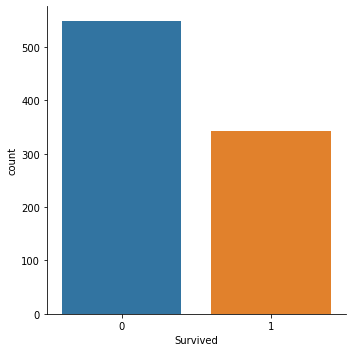

In [8]:
# Survived
sns.catplot(x='Survived', data=train_df, kind='count')
survived_perc = round((train_df['Survived'].sum()) / len(train_df.index) * 100,2)
print(f'Percentage who survived: {survived_perc}%')

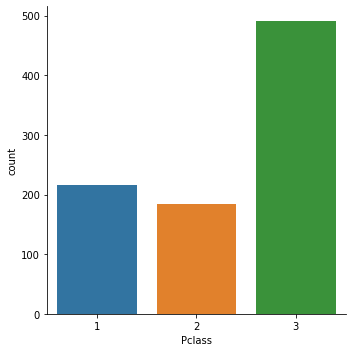

In [9]:
# PClass
sns.catplot(x='Pclass', data=train_df, kind='count')

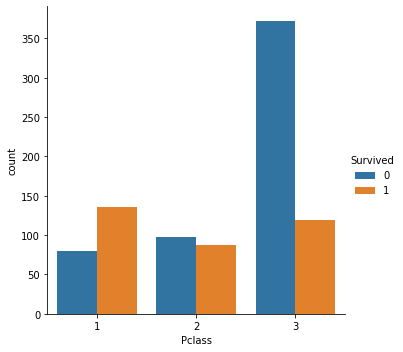

In [10]:
# PClass and Survived
sns.catplot(x='Pclass', hue='Survived', data=train_df, kind='count')

As expected, Pclass appears to be correlated with survival.

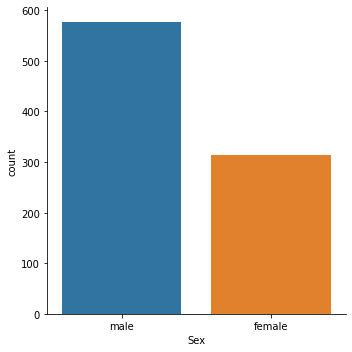

In [11]:
# Sex
sns.catplot(x='Sex', data=train_df, kind='count')

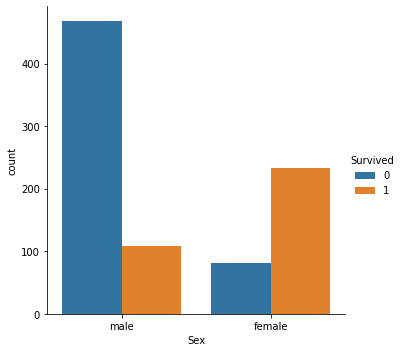

In [12]:
# Sex and Survived
sns.catplot(x='Sex', hue='Survived', data=train_df, kind='count')

As expected, Sex appears to be correlated with survival.

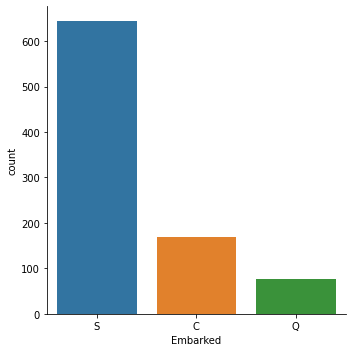

In [13]:
# Embarked
sns.catplot(x='Embarked', data=train_df, kind='count')

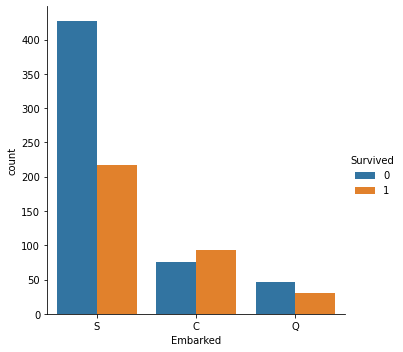

In [14]:
# Embarked and Survived
sns.catplot(x='Embarked', hue='Survived', data=train_df, kind='count')

This is an initially surprising finding, though I think perhaps Embarked may be correlated with Pclass.

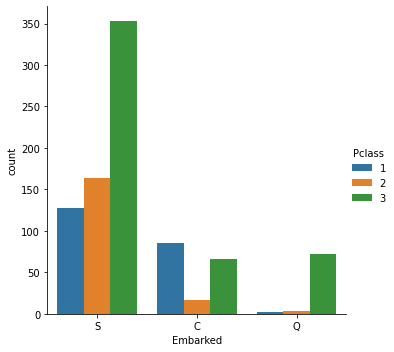

In [15]:
# Embarked and Pclass
sns.catplot(x='Embarked', hue='Pclass', data=train_df, kind='count')

As expected, S is disproportionately 3rd class. I would consider this a spurious correlation as Pclass is likely the underlying structure driving survival in this case (phrased differently, I do not think being from C or Q means you are a better swimmer).

In [16]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='Age'>

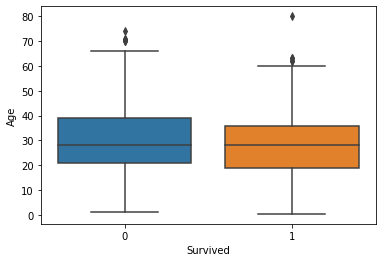

In [18]:
# Survived and Age
sns.boxplot(x='Survived', y='Age', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

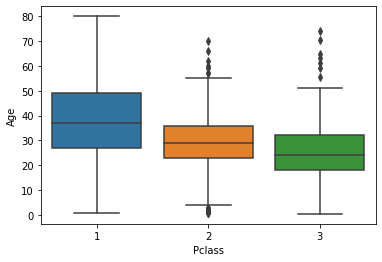

In [19]:
# Pclass and Age
sns.boxplot(x='Pclass', y='Age', data=train_df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

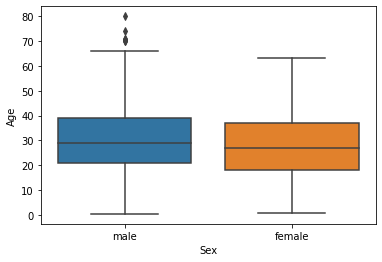

In [20]:
# Sex and Age
sns.boxplot(x='Sex', y='Age', data=train_df)

Younger passengers were more likely to not survive than older passengers.  

It appears that 1st class passengers were disproportionately older. 2nd class passengers were also older than 3rd class.  

Male passengers were older than female passengers.  

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

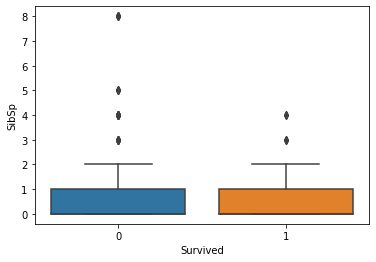

In [21]:
# Survived and SibSp
sns.boxplot(x='Survived', y='SibSp', data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

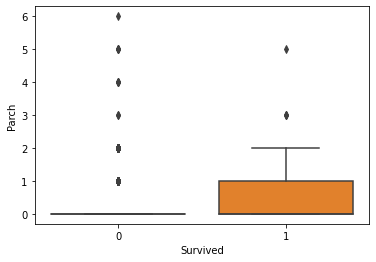

In [22]:
# Survived and Parch
sns.boxplot(x='Survived', y='Parch', data=train_df)

It appears that SibSp relationship does not impact survival.  

It does appear that having a Parch relationship impacts survival.

---
# Modeling

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# make copies of original data
e_train_df = train_df.copy()
e_test_df = test_df.copy()

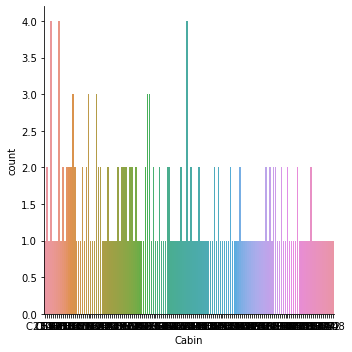

In [25]:
# determine if Cabin is high cardinality
sns.catplot(x='Cabin', data=e_train_df, kind='count')

As you can see, Cabin is a high cardinality feature. We could either:
* impute it with 'missing' value
* try and get it from the Ticket.

In [26]:
# see if there is a connection between Ticket and Cabin
e_train_df.loc[e_train_df['Cabin'].notnull(), ['Ticket', 'Cabin']].head(10)

,Ticket,Cabin
1,PC 17599,C85
3,113803,C123
6,17463,E46
10,PP 9549,G6
11,113783,C103
21,248698,D56
23,113788,A6
27,19950,C23 C25 C27
31,PC 17569,B78
52,PC 17572,D33


Therefore, we cannot use Ticket to determine Cabin. What is likely occurring is that some tickets did not come with an assigned cabin.

In [27]:
# retain information on missing values prior to imputation
e_train_df['cabin_missing'] = e_train_df['Cabin'].isnull().map({True: 1, False: 0})
e_train_df['embarked_missing'] = e_train_df['Embarked'].isnull().map({True: 1, False: 0})
e_train_df['age_missing'] = e_train_df['Age'].isnull().map({True: 1, False: 0})
e_train_df['fare_missing'] = e_train_df['Fare'].isnull().map({True: 1, False: 0})
e_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  cabin_missing     891 non-null    int64  
 13  embarked_missing  891 non-null    int64  
 14  age_missing       891 non-null    int64  
 15  fare_missing      891 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory us

In [28]:
# retain information on missing values prior to imputation
e_test_df['cabin_missing'] = e_test_df['Cabin'].isnull().map({True: 1, False: 0})
e_test_df['embarked_missing'] = e_test_df['Embarked'].isnull().map({True: 1, False: 0})
e_test_df['age_missing'] = e_test_df['Age'].isnull().map({True: 1, False: 0})
e_test_df['fare_missing'] = e_test_df['Fare'].isnull().map({True: 1, False: 0})
e_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Age               332 non-null    float64
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              417 non-null    float64
 9   Cabin             91 non-null     object 
 10  Embarked          418 non-null    object 
 11  cabin_missing     418 non-null    int64  
 12  embarked_missing  418 non-null    int64  
 13  age_missing       418 non-null    int64  
 14  fare_missing      418 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 49.1+ KB


In [29]:
# categorical impute
e_train_df['Cabin'] = e_train_df['Cabin'].fillna('Missing') 
e_train_df['Embarked'] = e_train_df['Embarked'].fillna(e_train_df['Embarked'].mode()[0])
e_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             891 non-null    object 
 11  Embarked          891 non-null    object 
 12  cabin_missing     891 non-null    int64  
 13  embarked_missing  891 non-null    int64  
 14  age_missing       891 non-null    int64  
 15  fare_missing      891 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory us

In [30]:
# categorical impute
e_test_df['Cabin'] = e_test_df['Cabin'].fillna('Missing')
e_test_df['Embarked'] = e_test_df['Cabin'].fillna(e_test_df['Embarked'].mode()[0])
e_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Age               332 non-null    float64
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              417 non-null    float64
 9   Cabin             418 non-null    object 
 10  Embarked          418 non-null    object 
 11  cabin_missing     418 non-null    int64  
 12  embarked_missing  418 non-null    int64  
 13  age_missing       418 non-null    int64  
 14  fare_missing      418 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 49.1+ KB


<AxesSubplot:xlabel='Age'>

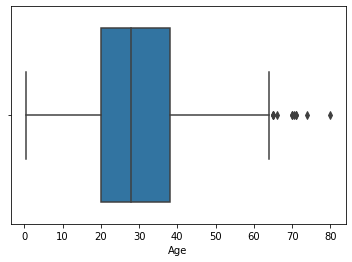

In [31]:
# checking Age for distribution and outliers
sns.boxplot(x='Age', data=train_df)

<AxesSubplot:xlabel='Fare'>

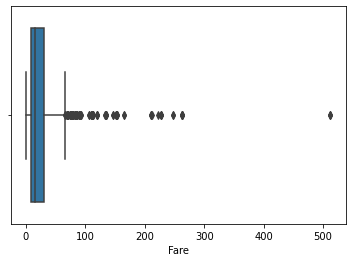

In [32]:
# checking Fare for distribution and outliers
sns.boxplot(x='Fare', data=train_df)

It appears that Age is relatively symmetrical and that Fare is right skewed. I will use **mean** imputation for Age and **median** imputation for Fare.

In [33]:
# quantitative impute
e_train_df['Age'] = e_train_df['Age'].fillna(e_train_df['Age'].mean())
e_train_df['Fare'] = e_train_df['Fare'].fillna(e_train_df['Fare'].median())
e_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             891 non-null    object 
 11  Embarked          891 non-null    object 
 12  cabin_missing     891 non-null    int64  
 13  embarked_missing  891 non-null    int64  
 14  age_missing       891 non-null    int64  
 15  fare_missing      891 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory us

In [34]:
# quantitative impute
e_test_df['Age'] = e_test_df['Age'].fillna(e_test_df['Age'].mean())
e_test_df['Fare'] = e_test_df['Fare'].fillna(e_test_df['Fare'].median())
e_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Age               418 non-null    float64
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              418 non-null    float64
 9   Cabin             418 non-null    object 
 10  Embarked          418 non-null    object 
 11  cabin_missing     418 non-null    int64  
 12  embarked_missing  418 non-null    int64  
 13  age_missing       418 non-null    int64  
 14  fare_missing      418 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 49.1+ KB


In [35]:
# age_bucket


In [36]:
# title

ship_location = what specific area were you on the ship. I will use first letter of ticket to determine)

In [37]:
# ship_location
train_cabin_set = set(e_train_df['Cabin'].tolist())
test_cabin_set = set(e_test_df['Cabin'].tolist())
cabins_sorted = sorted(train_cabin_set.union(test_cabin_set))
print(f'Cabins in sort order: {cabins_sorted}')

Cabins in sort order: ['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23', 'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22', 'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110', 'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28', 'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86', 'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D22', 'D26', 'D28', 'D30', 'D3

In [38]:
# ship_location
e_train_df['ship_location'] = e_train_df['Cabin'].astype(str).str[0]
e_test_df['ship_location'] = e_test_df['Cabin'].astype(str).str[0]

family_size = The total amount of siblings, spouses, parents and children. The idea here is that larger families do not want to be split up, where as individuals can make more ruthless survi

In [39]:
# family_size
e_train_df['family_size'] = e_train_df['SibSp'] + e_train_df['Parch']
e_test_df['family_size'] = e_test_df['SibSp'] + e_test_df['Parch']

**One Hot Encode:**
* Pclass
* Embarked
* age_bucket
* title
* ship_location
* has_spouse
* has_child
* has_parent

**Standardize/Scaling:**
* Age
* Fare

**Drop Columns**:
* PassengerID
* Name
* Ticket

---
# Submission